<a href="https://colab.research.google.com/github/JaebinChoi/Recommendation-System/blob/master/content_based_recommendation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/gdrive/My Drive/Recommend'

### Read Data

In [78]:
ratings =  pd.read_pickle('%s/data/ml-latest-small/ratings_updated.p' % path)
genres = pd.read_pickle('%s/data/ml-latest-small/genres.p' % path)

In [79]:
ratings.sample()

,userId,movieId,rating,timestamp
97827,606,2897,4.0,2007-02-13 10:09:40


In [80]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
74370,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### User Profile (Sample Data)

In [81]:
user414 = ratings[ratings['userId'] == 414]
user414.sample()

,userId,movieId,rating,timestamp
63962,414,5464,4.0,2002-07-16 13:36:57


In [38]:
# 영화 관람을 엄청 많이 함
len(user414)

2698

In [82]:
# user414의 movieId를 기준으로, genres의 index를 기준으로 조인
user414 = user414.merge(genres, left_on='movieId', right_index=True)

In [84]:
user414.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
63432,414,3507,5.0,2000-06-21 13:56:46,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(user414[genres.columns], user414['rating'], random_state=42, test_size=42)

In [89]:
# feature, x : y를 예측하기 위해 필요한 정보들
# label, y : 정답

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2656, 20)
(42, 20)
(2656,)
(42,)


In [90]:
x_train.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64109,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [91]:
y_train.sample()

62941    3.0
Name: rating, dtype: float64

### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
reg = LinearRegression()

In [94]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
reg.coef_

array([ 1.04160282, -0.16765085,  0.11266998,  0.6470244 , -0.28636112,
       -0.07175291,  0.1755062 ,  0.42369745,  0.32260747,  0.06520916,
        0.30005944, -0.16750376,  0.34178126,  0.01701818,  0.20658032,
       -0.0161549 ,  0.17045366, -0.13324596,  0.42657798,  0.29761732])

In [97]:
reg.intercept_

3.2083971762035204

In [107]:
# baseline score + Action 장르에 대한 coefficient + Adventure 장르에 대한 coefficient
# Action | Adventure
reg.intercept_ + reg.coef_[1] + reg.coef_[2]

3.1534163068395666

In [101]:
list(zip(x_train.columns, reg.coef_))

[('(no genres listed)', 1.0416028237964734),
 ('Action', -0.16765084808775782),
 ('Adventure', 0.11266997872380434),
 ('Animation', 0.647024400468364),
 ('Children', -0.28636112002225117),
 ('Comedy', -0.07175290614434772),
 ('Crime', 0.17550620046289703),
 ('Documentary', 0.4236974512206153),
 ('Drama', 0.3226074723097408),
 ('Fantasy', 0.06520916285712705),
 ('Film-Noir', 0.30005944367866516),
 ('Horror', -0.16750376258635977),
 ('IMAX', 0.34178126430889216),
 ('Musical', 0.01701817648759844),
 ('Mystery', 0.20658032435950804),
 ('Romance', -0.016154901772133756),
 ('Sci-Fi', 0.17045366312859975),
 ('Thriller', -0.13324596244305084),
 ('War', 0.42657798213011566),
 ('Western', 0.29761731969867855)]

In [108]:
%matplotlib inline

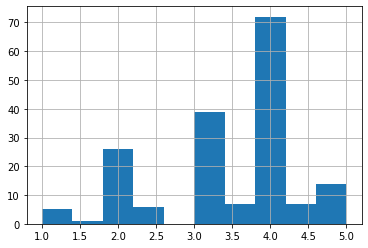

In [111]:
# user414['rating'].hist()

# Children 장르의 평점 히스토그램
user414.loc[user414['Children'] == 1, 'rating'].hist()

In [112]:
# 전체 장르에 대한 예측값
predict = reg.predict(x_test)

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

0.8233059773739537